[*Business Data Science: Combining Machine Learning and Economics to Optimize, Automate, and Accelerate Business*](https://www.amazon.com/Business-Data-Science-Combining-Accelerate/dp/1260452778/ref=sr_1_3?dchild=1&keywords=Business+Data+Science&qid=1618600384&sr=8-3) by Matt Taddy

Author's code [is here](https://github.com/TaddyLab/bds). My notes [are here](https://github.com/mkudija/mkudija.github.io/blob/master/reading/notes/2021-04-16-Business%20Data%20Science.md).
- [`Chapter 2.ipynb`](https://github.com/TaddyLab/BDS/blob/master/notebooks/jupyter-examples/Chapter%202.ipynb)


# Chapter 2 - Regression
## Linear Regression
Page 41-50

In [1]:
sessionInfo()
options(repr.plot.width=14,repr.plot.antialias='subpixel',repr.plot.res=218)
update.packages()

R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.4.1     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.0   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.6.0      rlang_0.4.11      uuid_0.1-4       
[13] vctrs_0.3.8       ellipsis_0.3.2    IRkernel_1.1.1    tools_4.0.5      
[17] compiler_4.0.5    base64enc_0.1-3   pbdZMQ_0.3-5      htmltools_0.5.1.1

In [2]:
data <- read.csv("https://raw.githubusercontent.com/TaddyLab/BDS/master/examples/oj.csv")
write.csv(data,"oj.csv", row.names = FALSE)
data$brand <- factor(data$brand)
head(data)

,sales,price,brand,feat
,<dbl>,<dbl>,<fct>,<int>
1,8256,3.87,tropicana,0
2,6144,3.87,tropicana,0
3,3840,3.87,tropicana,0
4,8000,3.87,tropicana,0
5,8896,3.87,tropicana,0
6,7168,3.87,tropicana,0


In [3]:
levels(data$brand)

[1] "dominicks"   "minute.maid" "tropicana"

In [4]:
summary(data)

     sales            price               brand           feat       
 Min.   :    64   Min.   :0.520   dominicks  :9649   Min.   :0.0000  
 1st Qu.:  4864   1st Qu.:1.790   minute.maid:9649   1st Qu.:0.0000  
 Median :  8384   Median :2.170   tropicana  :9649   Median :0.0000  
 Mean   : 17312   Mean   :2.282                      Mean   :0.2373  
 3rd Qu.: 17408   3rd Qu.:2.730                      3rd Qu.:0.0000  
 Max.   :716416   Max.   :3.870                      Max.   :1.0000  

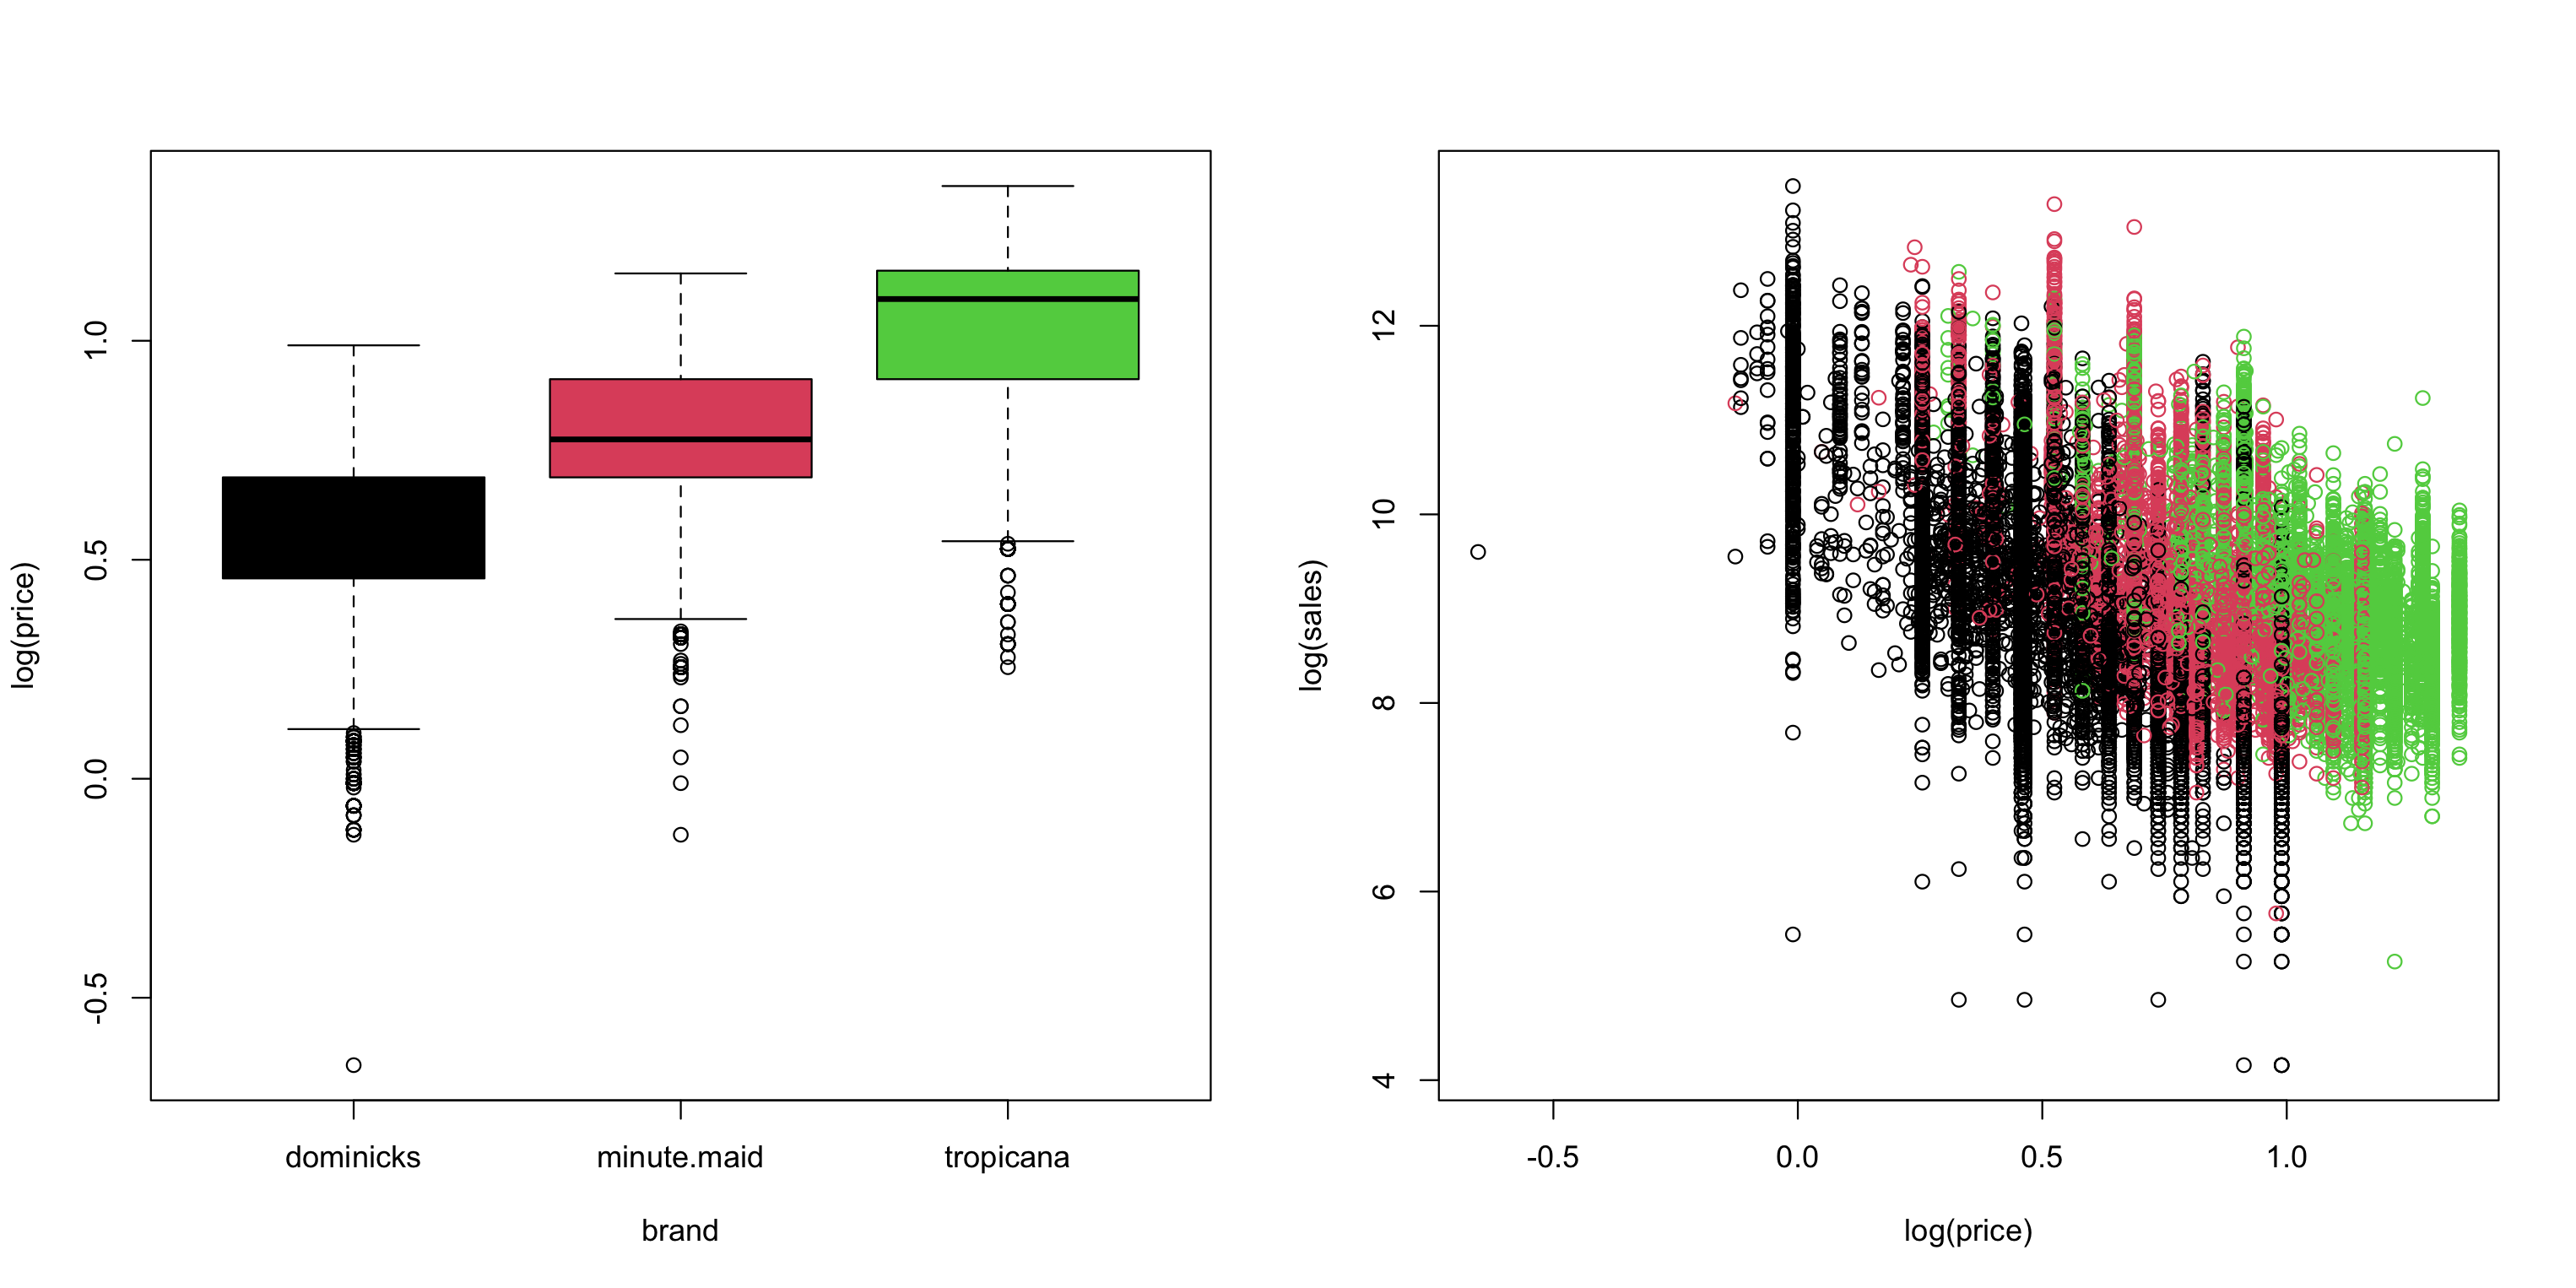

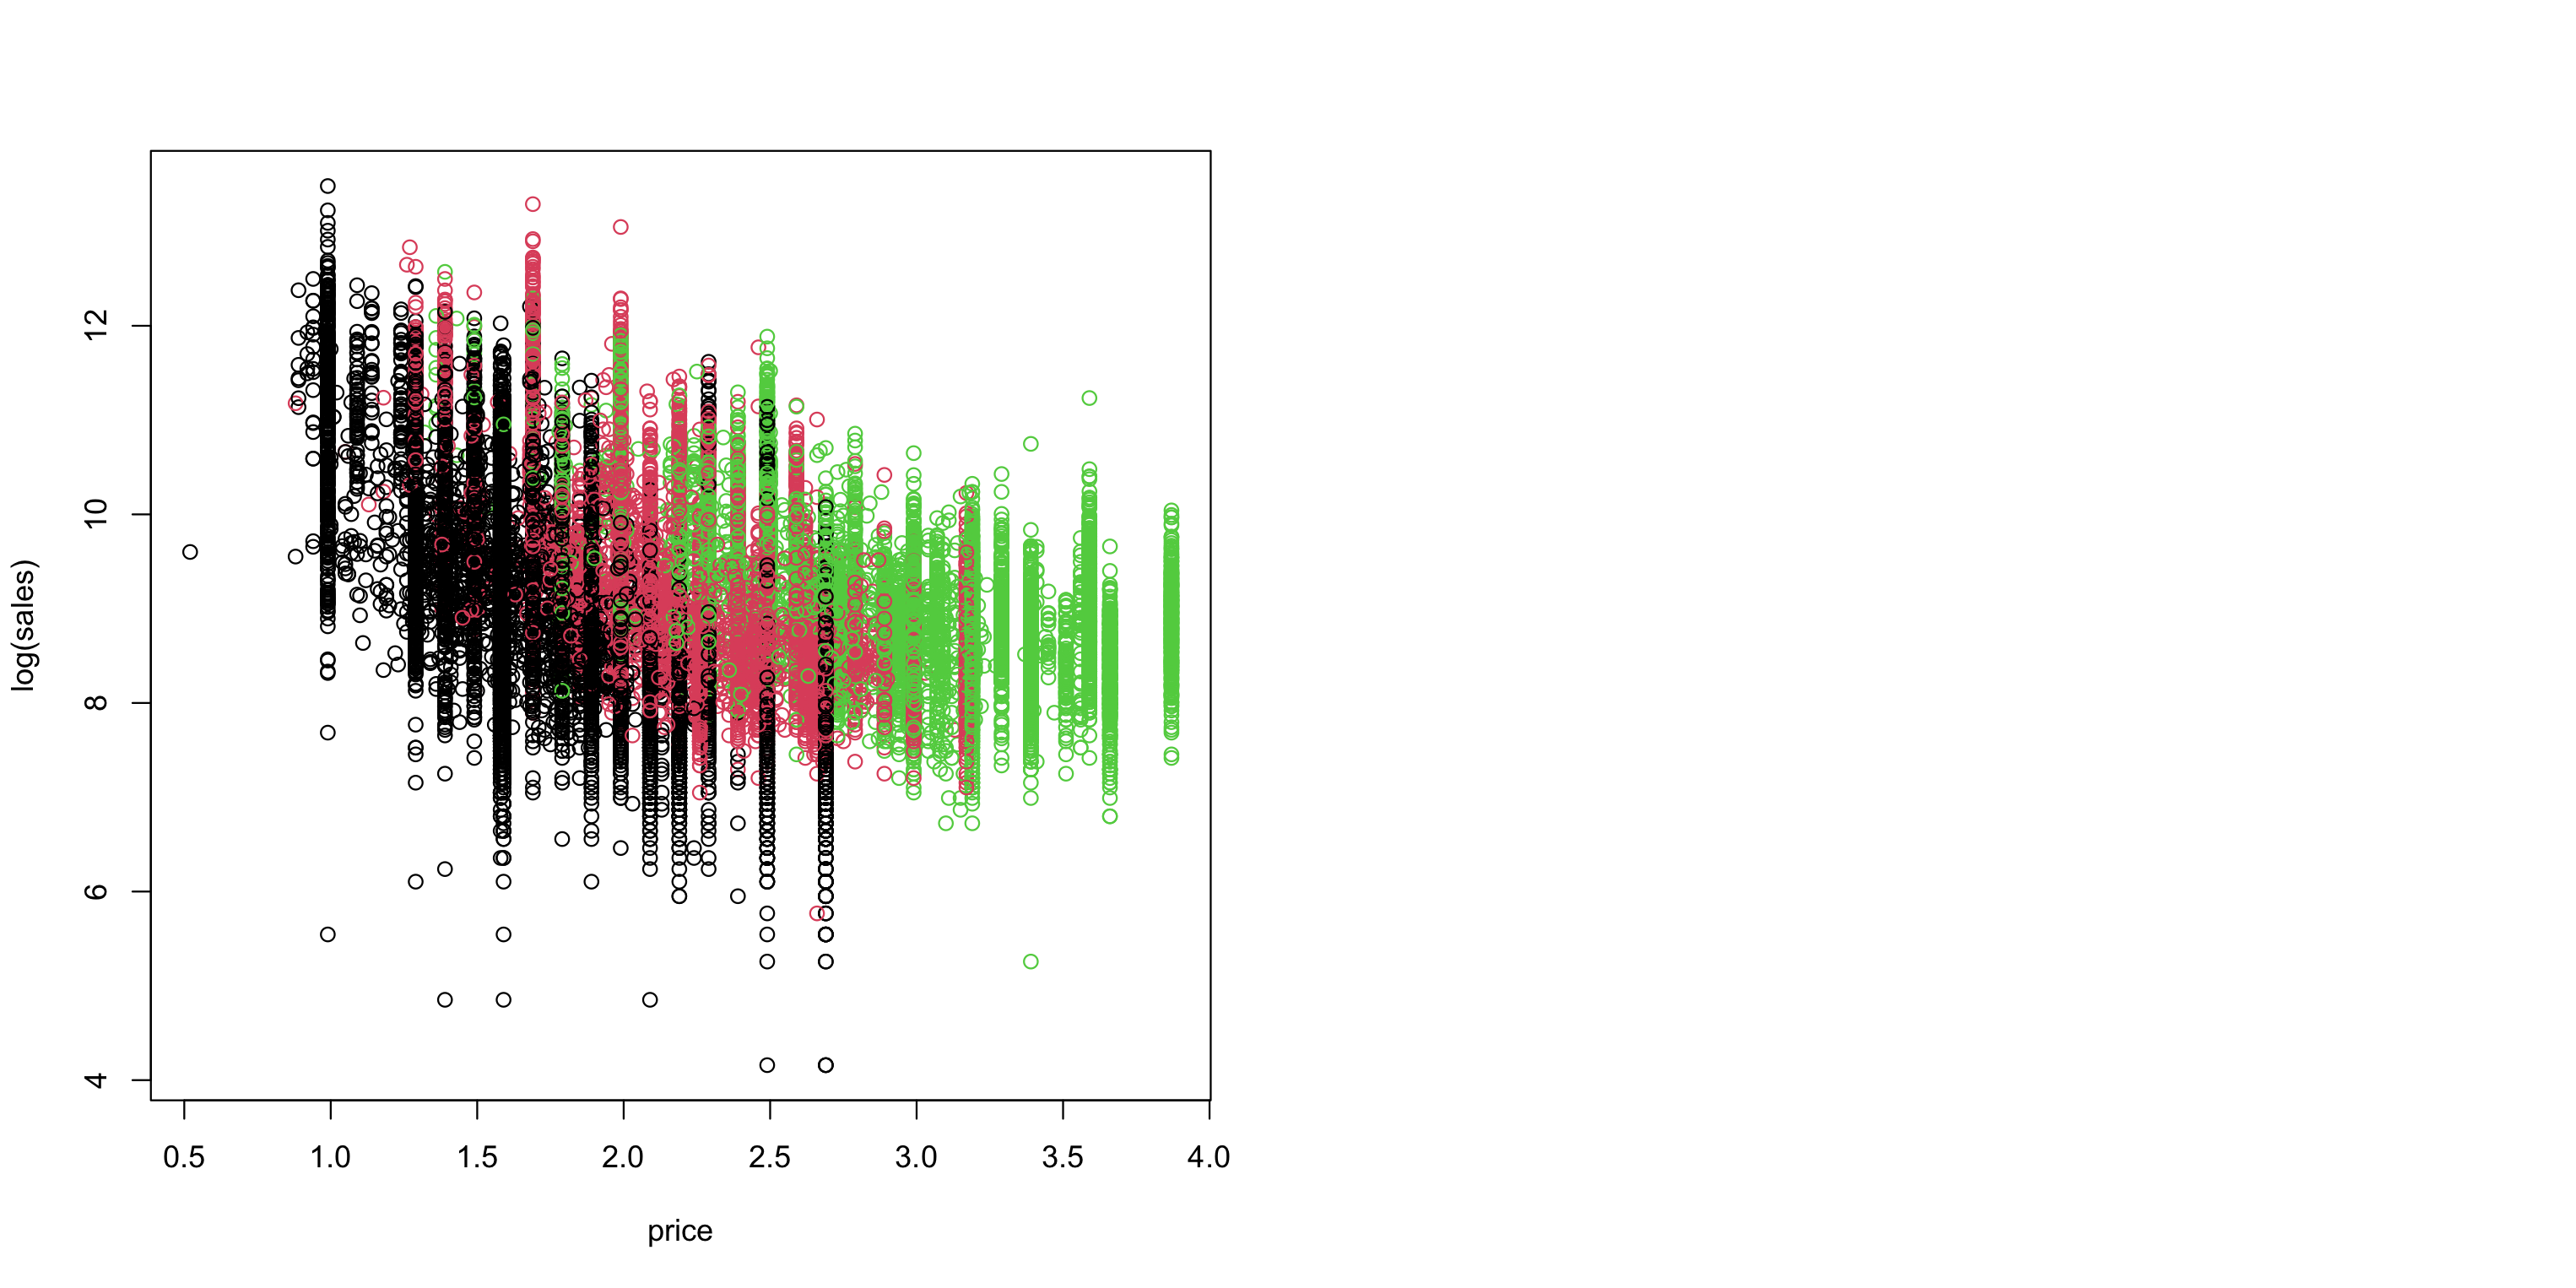

In [5]:
colors <- palette() # brandcol <- c("green","red","gold")
par(mfrow=c(1,2))
plot(log(price) ~ brand, data=data, col=colors)
plot(log(sales) ~ log(price), data=data, col=colors[data$brand])
plot(log(sales) ~ price, data=data, col=colors[data$brand])
#cool how you can do multiple plots in a cell

Simple linear regression of the form:

$y = \alpha + x\beta$

or logarithmic

$\log(y) = \alpha + \beta \log(x) + \epsilon$

The log-log model is intuitive: *$y$ increases by $\beta$% for every 1% increase in x*. 

$\beta$ is **elasticity**

In [6]:
reg = glm(log(sales) ~ log(price) + brand, data=data)

In [7]:
summary(reg)


Call:
glm(formula = log(sales) ~ log(price) + brand, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3152  -0.5246  -0.0502   0.4929   3.5088  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.82882    0.01453  745.04   <2e-16 ***
log(price)       -3.13869    0.02293 -136.89   <2e-16 ***
brandminute.maid  0.87017    0.01293   67.32   <2e-16 ***
brandtropicana    1.52994    0.01631   93.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6296804)

    Null deviance: 30079  on 28946  degrees of freedom
Residual deviance: 18225  on 28943  degrees of freedom
AIC: 68765

Number of Fisher Scoring iterations: 2


In [8]:
print(round(coef(reg),3))

     (Intercept)       log(price) brandminute.maid   brandtropicana 
          10.829           -3.139            0.870            1.530 


In [9]:
data[100,]

,sales,price,brand,feat
,<dbl>,<dbl>,<fct>,<int>
100,4416,3.19,tropicana,0


In [10]:
predict(reg, newdata=data[100,])

100 
8.717817

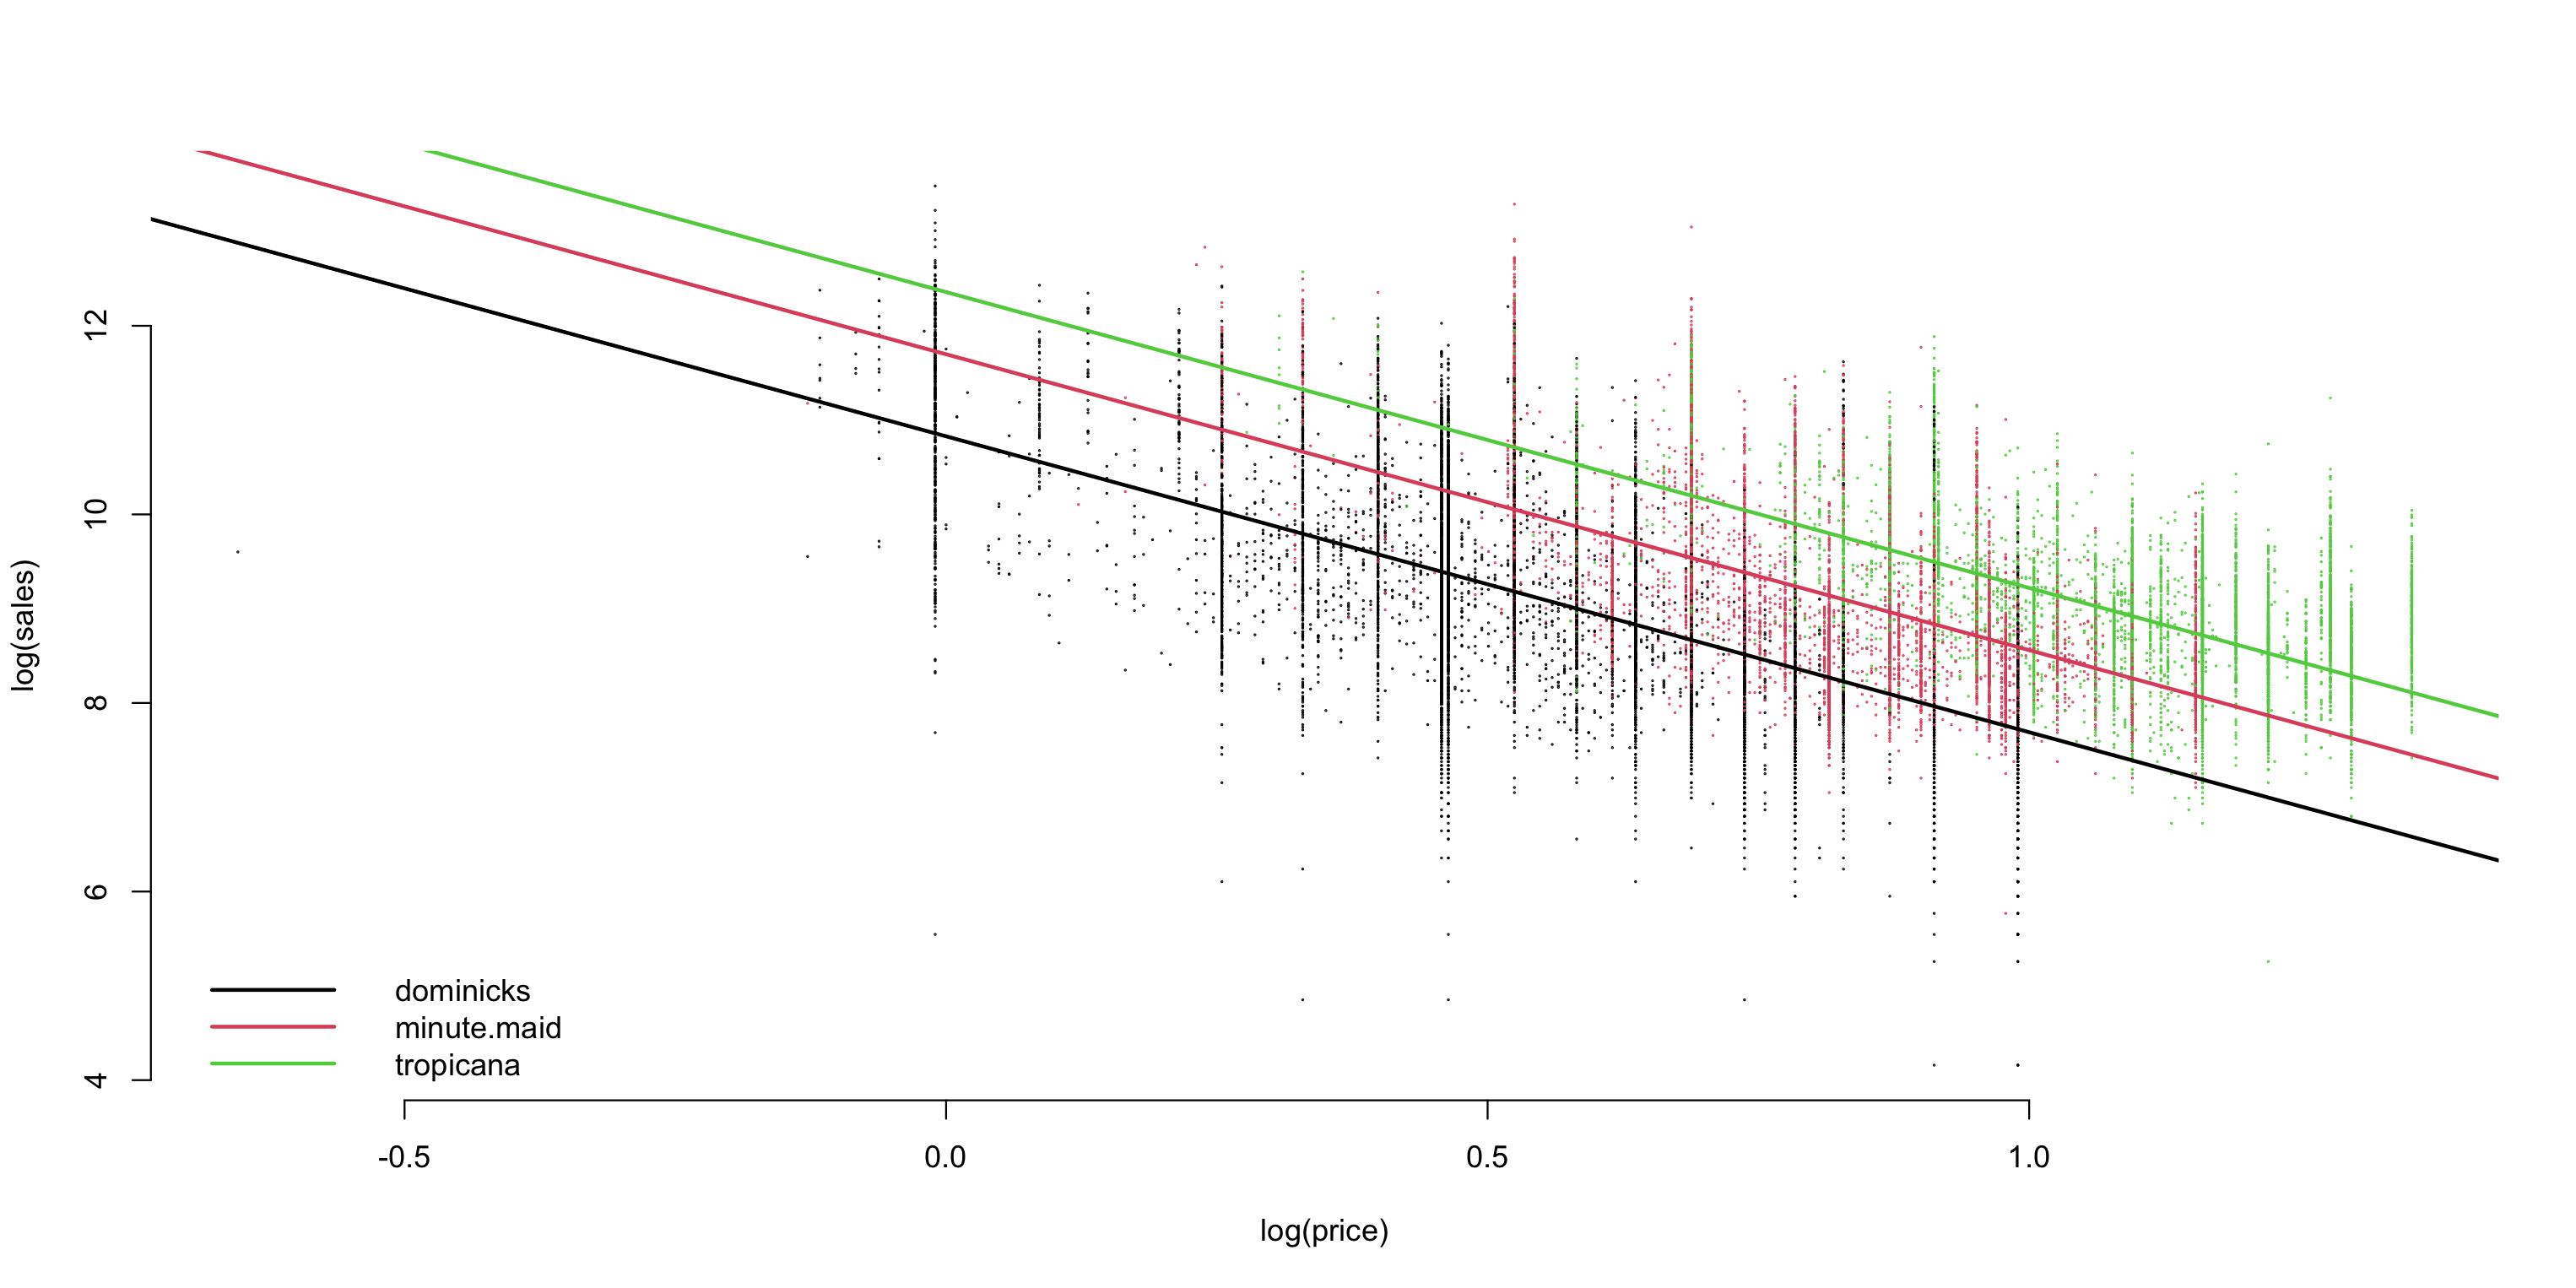

In [11]:
beta <- coef(reg)

plot(log(sales) ~ log(price), data=data, col=colors[data$brand], 
     cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=colors[1], lwd=2)
abline(a=beta[1]+beta[3], b=beta[2], col=colors[2], lwd=2)
abline(a=beta[1]+beta[4], b=beta[2], col=colors[3], lwd=2)
legend("bottomleft", bty="n", lwd=2, col=colors, legend=levels(data$brand))

This is how to understand the coefficients of the `glm` object:
- `beta[1]` = $\alpha$ (intercept for base: `brand=dominicks`)
- `beta[2]` = $\beta$ (slope)
- `beta[3]` = $\alpha_{mm}$ (incremental intercept for `brand=minute.maid`)
- `beta[4]` = $\alpha_{t}$ (incremental intercept for `brand=tropicana`)

In [12]:
print(round(coef(reg),3))

     (Intercept)       log(price) brandminute.maid   brandtropicana 
          10.829           -3.139            0.870            1.530 


In [13]:
beta[1]

(Intercept) 
   10.82882

In [14]:
beta[1]+beta[3]

(Intercept) 
     11.699

In [15]:
beta[1]+beta[4]

(Intercept) 
   12.35876

Next we use the R `*` to examine interactions between price and brand:

(Intercept)                  log(price) 
                10.95468173                 -3.37752963 
           brandminute.maid              brandtropicana 
                 0.88825363                  0.96238960 
log(price):brandminute.maid   log(price):brandtropicana 
                 0.05679476                  0.66576088

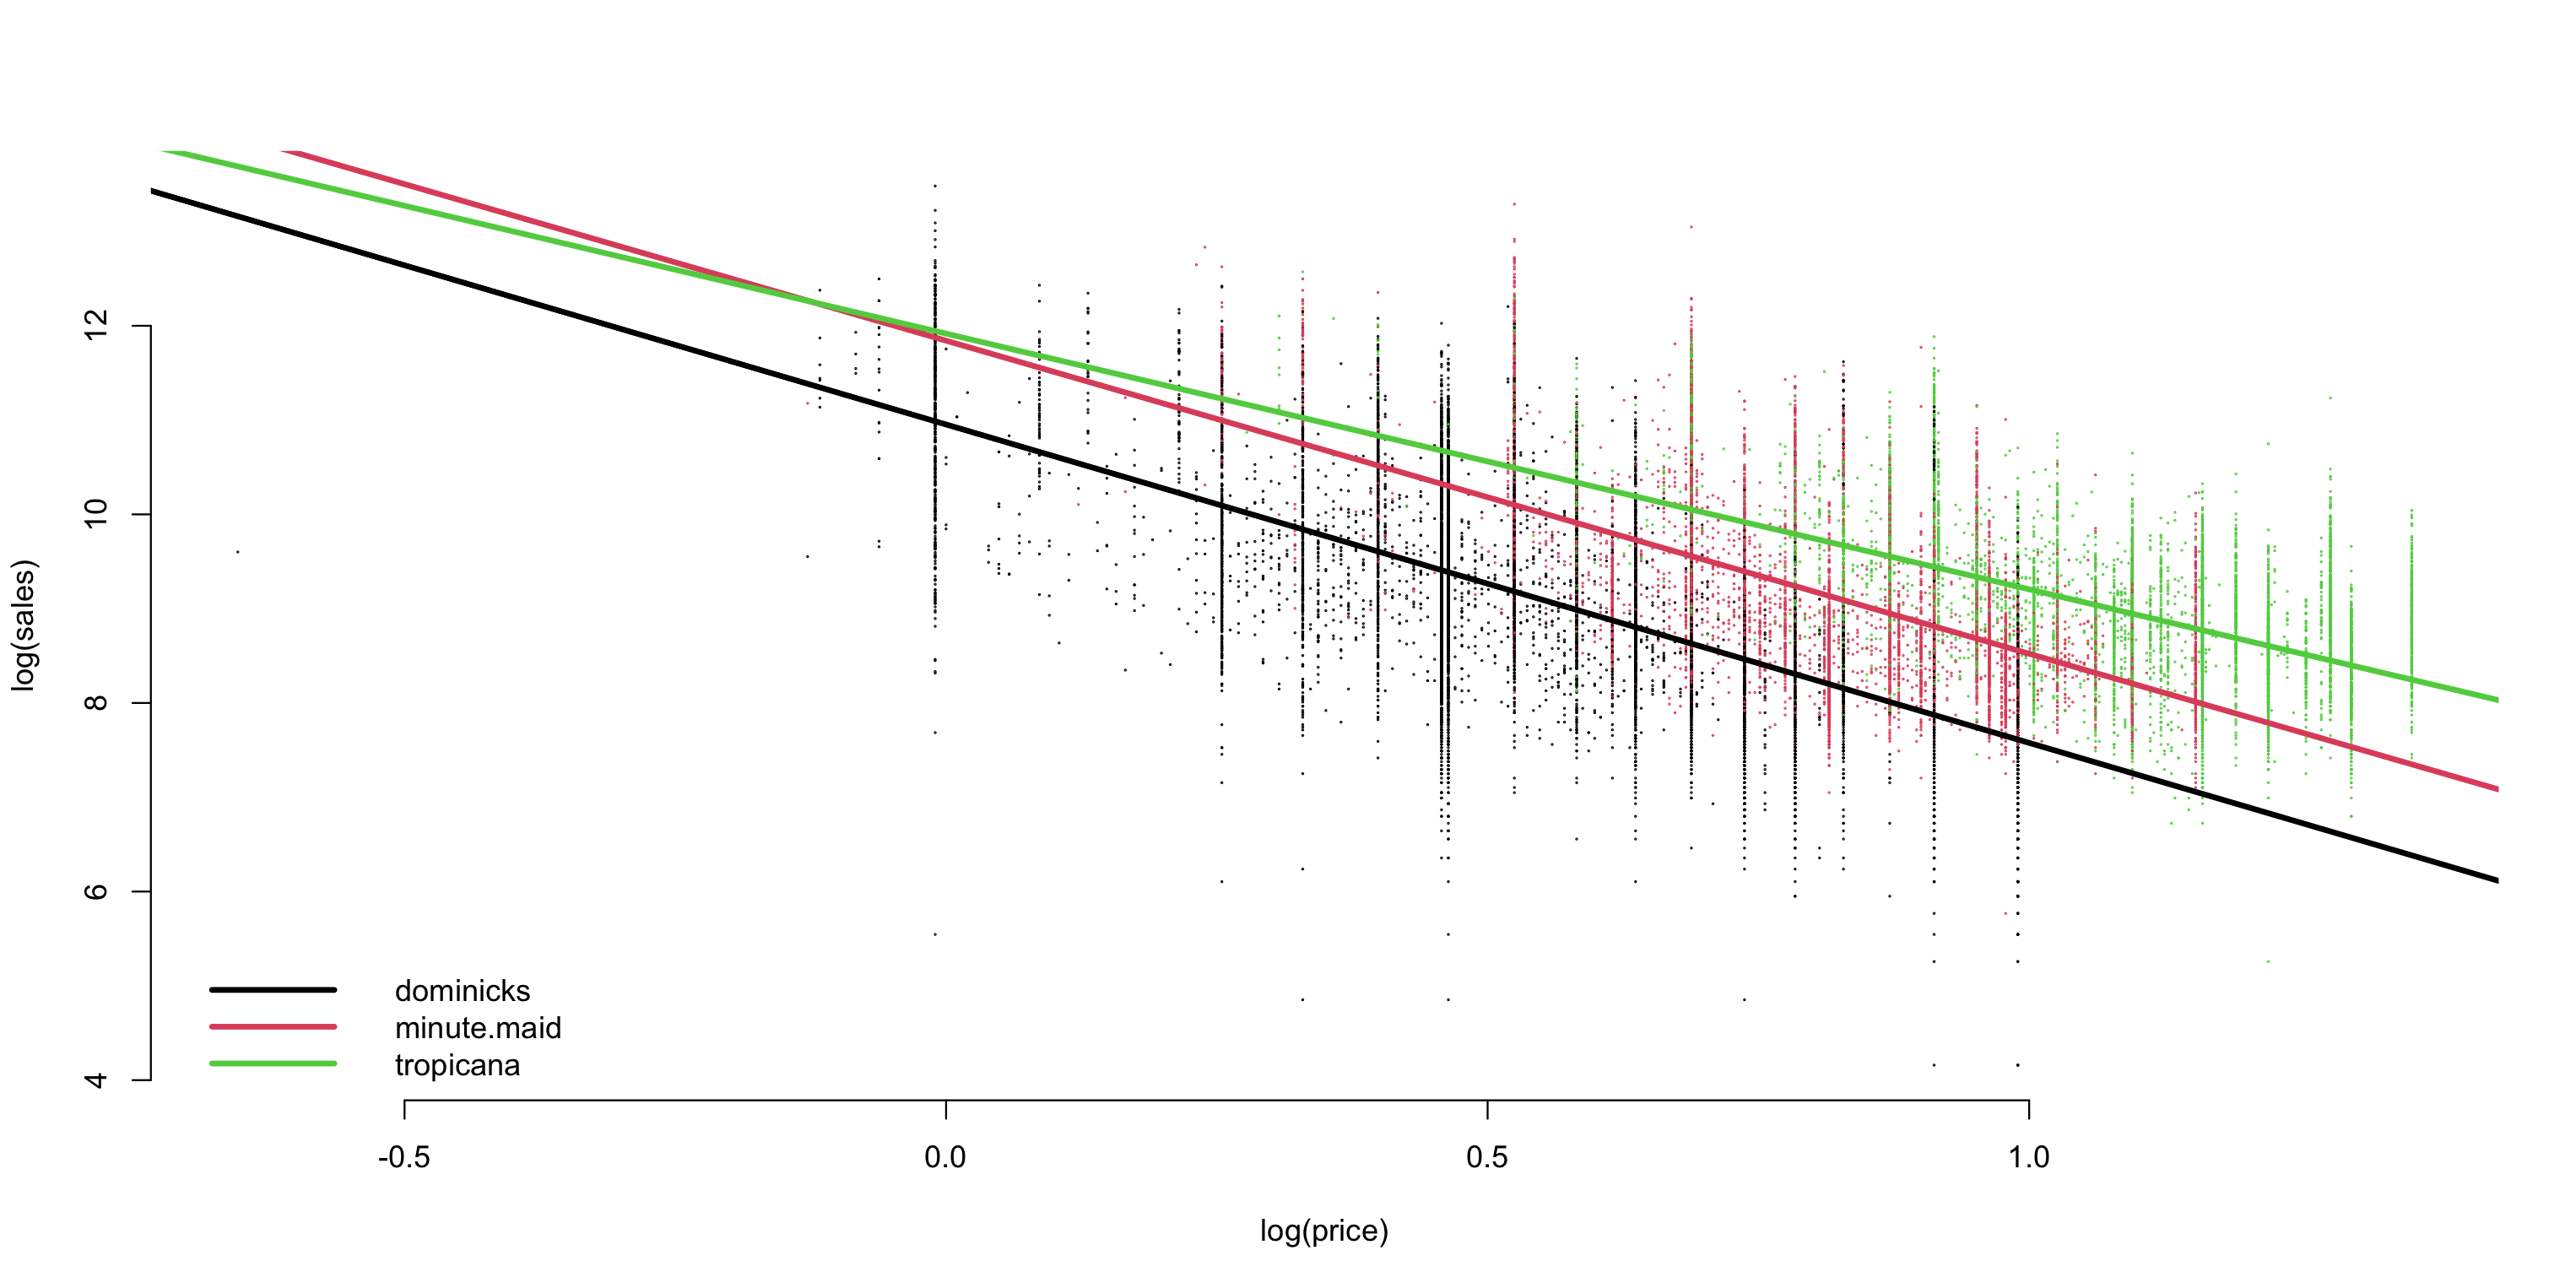

In [16]:
reg_interact = glm(log(sales) ~ log(price)*brand, data=data)
coef(reg_interact)

beta = coef(reg_interact)
plot(log(sales) ~ log(price), data=data, col=colors[data$brand],
    cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=colors[1], lw=3)
abline(a=beta[1]+beta[3], b=beta[2]+beta[5], col=colors[2], lw=3)
abline(a=beta[1]+beta[4], b=beta[2]+beta[6], col=colors[3], lw=3)
legend("bottomleft", bty="n", lw=3, col=colors, legend=levels(data$brand))

This is how to understand the coefficients of the `glm` object with interactions:
- `beta[1]` = $\alpha$ (intercept for base: `brand=dominicks`)
- `beta[2]` = $\beta$ (slope for base: `brand=dominicks`)
- `beta[3]` = $\alpha_{mm}$ (incremental intercept for `brand=minute.maid`)
- `beta[4]` = $\alpha_{t}$ (incremental intercept for `brand=tropicana`)
- `beta[5]` = $\beta_{mm}$ (incremental slope for `brand=tropicana`)
- `beta[6]` = $\beta_{t}$ (incremental slopee for `brand=tropicana`)

In [17]:
print(round(coef(reg_interact),3))

                (Intercept)                  log(price) 
                     10.955                      -3.378 
           brandminute.maid              brandtropicana 
                      0.888                       0.962 
log(price):brandminute.maid   log(price):brandtropicana 
                      0.057                       0.666 


These produce the price elasticities by brand in Table 2.1 on page 48:

In [18]:
# Dominick's
round(beta[2],1)

log(price) 
      -3.4

In [19]:
# Minute Maid
round(beta[2]+beta[5],1)

log(price) 
      -3.3

In [20]:
# Tropicana
round(beta[2]+beta[6],1)

log(price) 
      -2.7

## Logistic Regression
*(page 50-53)*

- Logistic regression uses the *logit* link function to scale probabilities between 0 and 1:

$$p(y=1|x) = \frac{e^{x' \hat{\beta}}}{1 + e^{x' \hat{\beta}}}$$

- Logistic regression is a linear model for log odds (where odds = probability it happens over probability it doesn't):

$$\log \left[ \frac{p}{1-p} \right] = \beta_{0} + \beta_{1}x_{1}... + \beta_{p}x_{p}$$



**Example**: Predict if an email is spam

In [1]:
data <- read.csv("https://raw.githubusercontent.com/TaddyLab/BDS/master/examples/spam.csv")
write.csv(data,"spam.csv", row.names = FALSE)
head(data)

,word_make,word_address,word_all,word_3d,word_our,word_over,word_remove,word_internet,word_order,word_mail,⋯,char_semicolon,char_leftbrac,char_leftsquarebrac,char_exclaim,char_dollar,char_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0,1,1,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,3.756,61,278,1
2,1,1,1,0,1,1,1,1,0,1,⋯,0,1,0,1,1,1,5.114,101,1028,1
3,1,0,1,0,1,1,1,1,1,1,⋯,1,1,0,1,1,1,9.821,485,2259,1
4,0,0,0,0,1,0,1,1,1,1,⋯,0,1,0,1,0,0,3.537,40,191,1
5,0,0,0,0,1,0,1,1,1,1,⋯,0,1,0,1,0,0,3.537,40,191,1
6,0,0,0,0,1,0,0,1,0,0,⋯,0,1,0,0,0,0,3.000,15,54,1


In [2]:
data[c(1,4000), c(16,56,58)]

,word_free,capital_run_length_longest,spam
,<int>,<int>,<int>
1,1,61,1
4000,0,26,0


Fit a GLM
- "`family='binomial'`" for logistic regression
- "`y ~ .`" to regress y on to all variables in the data

In [3]:
spammy <- glm(spam ~ ., data=data, family='binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Interpreting coefficients: $e^{\beta k}$ is the *multiplicative effect for a unit increase in $x_{k}$ on the odds for the event* $y=1$.

Therefore, looking at the coefficient for the presence of the word "free" and taking $e^{coef}$ we can see that the odds an email is spam increase by a factor of almost 5 if the email contains the word "free".

Likewise, if it contains the word "George" the odds drop by a factor of over 300 (the email sample is from a guy named George).

In [6]:
c = coef(spammy)['word_free']
cat(c)

1.542706

In [7]:
exp(c)

word_free 
 4.677229

In [8]:
c = coef(spammy)['word_george']
cat(c)

-5.779841

In [10]:
1/exp(c)

word_george 
   323.7078

Contingency tables for these:

In [21]:
table(data$spam, data$word_free)
table(data$spam, data$word_george)

   
       0    1
  0 2536  252
  1  824  989

   
       0    1
  0 2016  772
  1 1805    8

**Prediction**: Now let's make a prediction with the logistic GLM for these two observations.

In [13]:
data[c(1,4000),]

,word_make,word_address,word_all,word_3d,word_our,word_over,word_remove,word_internet,word_order,word_mail,⋯,char_semicolon,char_leftbrac,char_leftsquarebrac,char_exclaim,char_dollar,char_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0,1,1,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,3.756,61,278,1
4000,1,0,1,0,1,0,0,1,0,1,⋯,1,1,0,0,1,0,2.442,26,591,0


In [11]:
predict(spammy, newdata=data[c(1,4000),])

1      4000 
 2.029963 -1.726788

When predicting, call "`type='response'`" to run predictions through the logit link as $e^{x' \hat{\beta}} / (1 + e^{x' \hat{\beta}})$.

In [12]:
predict(spammy, newdata=data[c(1,4000),], type='response')

1      4000 
0.8839073 0.1509989

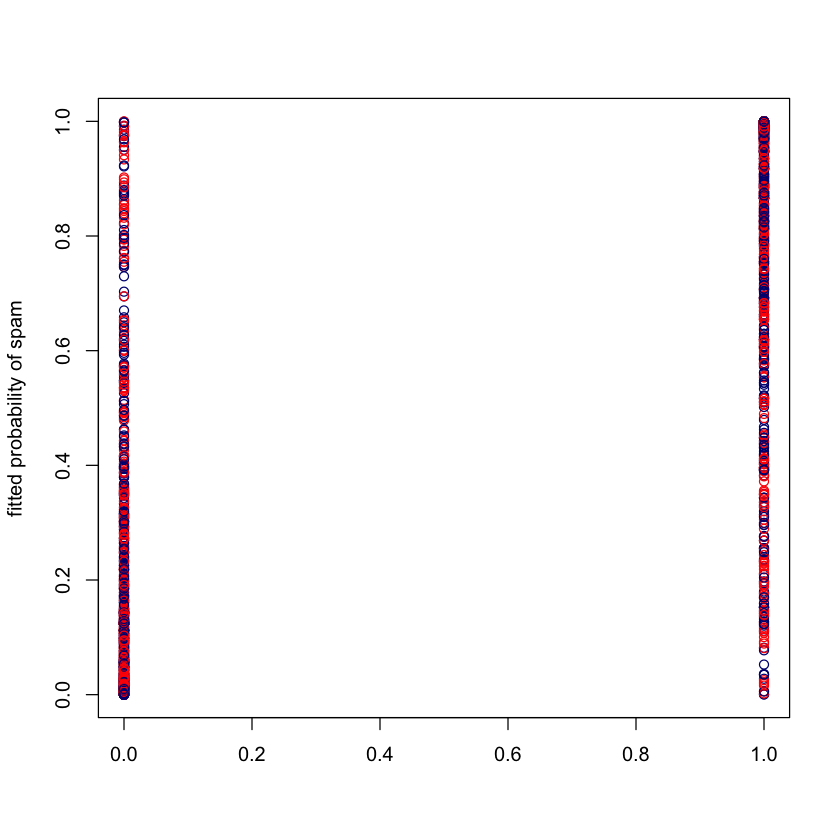

In [24]:
plot(spammy$fit~data$spam, 
    xlab="", ylab=c("fitted probability of spam"), 
    col=c("navy","red"))

**Out of sample prediction**: from 100 samples at random

In [26]:
leaveout <- sample(1:nrow(data), 1000)

In [27]:
spamtrain <- glm(spam ~ ., data=data[-leaveout,], family='binomial')

In [29]:
pspam <- predict(spamtrain, newdata=data[leaveout,], type="response")

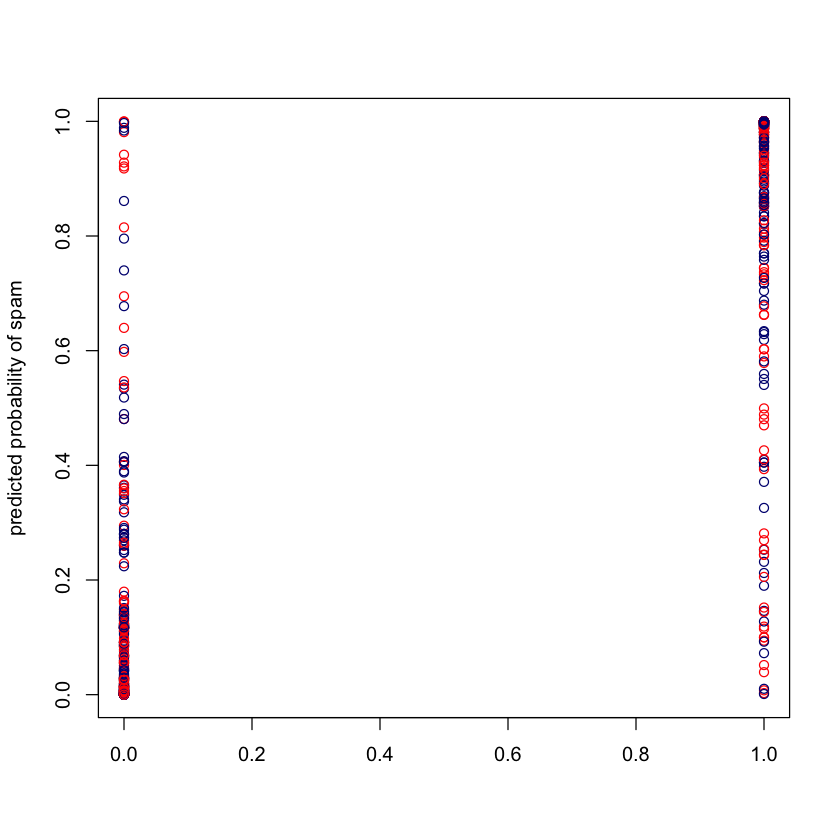

In [30]:
plot(pspam ~ data$spam[leaveout],
    xlab="", ylab=c("predicted probability of spam"), 
    col=c("navy","red"))

In [ ]:
...add deviance in 24

## Deviance and Likelihood
*(page 53-57)*

- *Likelihood* is the probability of your data given parameters (want as big as possible).
- *Deviance* measures the distance between data and fit (want as small as possible: the *cost to be minimized*).

$$Deviance = -2\log{Likelihood} + C$$

$C$ represents the *fully saturated* model where you have as many parameters as observations.

*Maximum likelihood estimation* (MLE): this deviance minimization strategy. To minimize deviance in the equation below we need to minimize the sum of squared errors, so MLE = OLS (ordinary least squares):

$$dev(\beta) \propto \sum_{i=1}^{n}(y_{i}-x^{'}_{i}\beta)^{2}$$

- *Residual deviance*: $D=dev(\hat{\beta})$ is deviance to fitted model.
- *Null deviance*: $D_{0}=dev(\beta=0)$ is deviance for null (basic) model where all $\hat{y}_{i}=\bar{y}$

The difference between $D$ and $D_{0}$ is due to information contained in the covariates. $R^{2}$ is the *proportion of deviance explained by $x$*:

$$R^{2} = \frac{D_{0}-D}{D_{0}} = 1 - \frac{D}{D_{0}}$$

This general form allows you to compute $R^{2}$ for almost any machine learning model (rather than the form specific to the linear regression: $R^{2} = \frac{SSE}{SST}$).

Other R summary output parameters:
- *Dispersion parameter*: measure of variability around the fitted conditional means, estimate for error variance $\sigma^{2}$.
- *Degrees of freedom*: actually *residual degrees of freedom*, or *number of observations less number of parameters*
- *Degrees of freedom* for the rest of the book refers to *model degrees of freedom*, or *number of parameters in the model*

## Regression Uncertainty
*(page 58-61)

- Since "standard" standar errors are sensistive to misspecification, we can use *nonparametric* methods to better estimate uncertainty
- The **bootstrap**: resample with replacement and use the uncertainty across samples as an estimate of actual sampling variance
- **Sandwich** variance estimator to get HC standard errors (*heteroskedastic consistent* rather than assuming *homoskedastic*), use the R `AER` package
- For OLS, HC standard errors approximate and are a fast alternative to bootstrapping

## Space and Time
*(page 61-67)*

- Previous discussion assumes independence between observations. 
- Since that's not the case, we can include variables behind dependence in the same GLM framework.
- Rather than building by hand, include many variables and use later Regularization and Model Selection chapters to select the appropriate ones to use.


In [ ]:
- In first example, include time and month variables to account for seasonality
<insert airline example code>


- When adding variables, *proceed hierarchically*: include larger (year, state) variables for any smaller ones (month, city)
- *Autocorrelation* occurs frequently with time series data that has local dependence. The autocorrelation function (ACF) tracks lag correlations.
- Model this type of data with a *Random Walk* (a form of *autoregressive* (AR) model), first order form of $AR(1)$:

$$AR(1): y_{t} = \beta_{0}+\beta{1}y_{t-1}+\epsilon_{t}$$

  - if $|\beta_{1}| = 1$, random walk (model with *returns* rather than *values* like the stock market)
  - if $|\beta_{1}| > 1$, series explodes (you might be missing a trend variable, otherwise challenging)
  - if $|\beta_{1}| < 1$, series reverts to mean (common and useful)

 - You can use $AR(p)$ for higher lags and model selection methods to choose the appropriate lag.
 - *Spatial autoregressive* (SAR) models to include spatial neighbors (similar to temporal neighbors)